# Importing Packages and Setting Global Figure Settings

In [1]:
import matplotlib
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

C:\Users\MatheusCF\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.frameon'] = False 
plt.rcParams['lines.linewidth'] = 4
# plt.rcParams['axes.facecolor'] = 'w' 
plt.rcParams['axes.edgecolor']='w'

# Diagonal Separation Parametrization Linear

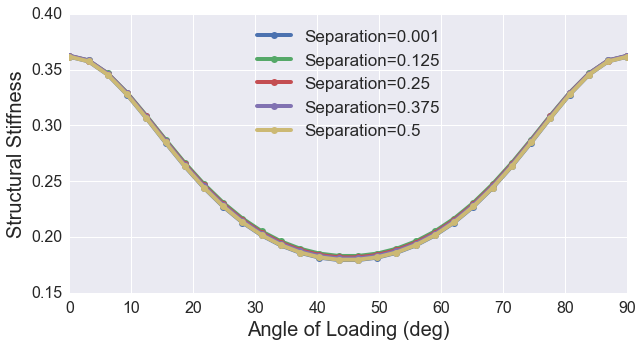

In [14]:
path='Diagonal Separation Linear/'

for j in xrange(5):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_D_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

    file = open(path+'ParametrizedDiag'+str(j)+'_RF_Output.txt', 'rb')
    table2 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

    file.close()

    Separation=table1[1,1]
    THETA=table1[:,2]

    DXX=table1[:,3]/10
    DXY=table1[:,4]/10
    DYX=table1[:,5]/10
    DYY=table1[:,6]/10

    RFXX=table2[:,3]
    RFXY=table2[:,4]
    RFYX=table2[:,5]
    RFYY=table2[:,6]
    
    ETemp=np.array([])
    NuTemp=np.array([])
    THETATemp=np.array([])
    for i in xrange(len(THETA)):
        THETATemp=np.append(THETATemp,THETA[i])
        ETemp=np.append(ETemp,RFYY[i]/DYY[i])
        NuTemp=np.append(NuTemp,-DXX[i]/DYY[i])
    if j==0:E=[ETemp];Nu=[NuTemp]
    else: E=np.append(E,[ETemp],axis=0);Nu=np.append(Nu,[NuTemp],axis=0)
    plt.figure(1)
    plt.plot(THETATemp,ETemp,'-o',label='Separation='+str(Separation))


plt.figure(1)
plt.xlabel(r'Angle of Loading (deg)')
plt.ylabel(r'Structural Stiffness')
plt.legend(loc=9)



# Linear Stiffness Poisson's Ratio Test

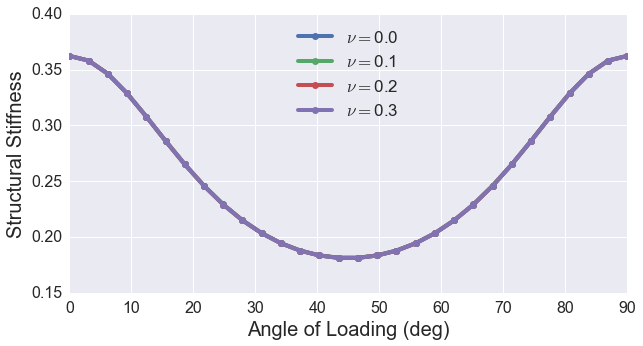

In [13]:
path='Linear Stiffness Poisson Ratio Test/'

for j in xrange(4):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_D_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file = open(path+'ParametrizedDiag'+str(j)+'_RF_Output.txt', 'rb')
    table2 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file.close()

    Diam=table1[1,1]
    Spacing=table1[1,1]/0.1
    THETA=table1[:,2]
    Poiss=table1[1,3]

    DXX=table1[:,4]
    DXY=table1[:,5]
    DYX=table1[:,6]
    DYY=table1[:,7]

    RFXX=table2[:,4]/(Spacing**3*0.1)
    RFXY=table2[:,5]/(Spacing**3*0.1)
    RFYX=table2[:,6]/(Spacing**3*0.1)
    RFYY=table2[:,7]/(Spacing**3*0.1)
    
    ETemp=np.array([])
    NuTemp=np.array([])
    THETATemp=np.array([])
    for i in xrange(len(THETA)):
        THETATemp=np.append(THETATemp,THETA[i])
        ETemp=np.append(ETemp,RFYY[i]/DYY[i])
    if j==0:E=[ETemp];Nu=[NuTemp]
    else: E=np.append(E,[ETemp],axis=0);Nu=np.append(Nu,[NuTemp],axis=0)
    plt.figure(1)
    plt.plot(THETATemp,ETemp,'-o',label=r'$\nu=$'+str(Poiss))

plt.figure(1)
plt.xlabel(r'Angle of Loading (deg)')
plt.ylabel(r'Structural Stiffness')
plt.legend(loc=9)

# Linear Stiffness D over L Test

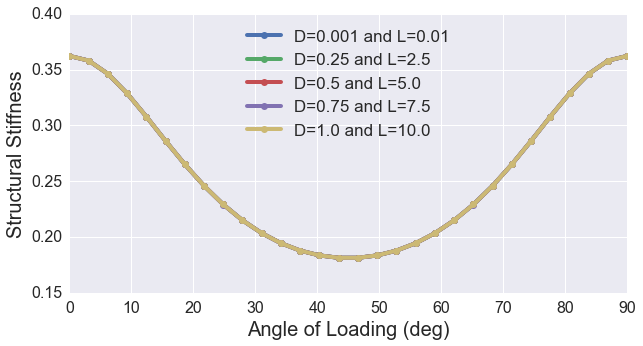

In [12]:
path='Linear Stiffness D over L Test/'

for j in xrange(5):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_D_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file = open(path+'ParametrizedDiag'+str(j)+'_RF_Output.txt', 'rb')
    table2 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file.close()

    Diam=table1[1,1]
    Spacing=table1[1,1]/0.1
    THETA=table1[:,2]

    DXX=table1[:,3]
    DXY=table1[:,4]
    DYX=table1[:,5]
    DYY=table1[:,6]

    RFXX=table2[:,3]/(Spacing**3*0.1)
    RFXY=table2[:,4]/(Spacing**3*0.1)
    RFYX=table2[:,5]/(Spacing**3*0.1)
    RFYY=table2[:,6]/(Spacing**3*0.1)
    
    ETemp=np.array([])
    NuTemp=np.array([])
    THETATemp=np.array([])
    for i in xrange(len(THETA)):
        THETATemp=np.append(THETATemp,THETA[i])
        ETemp=np.append(ETemp,RFYY[i]/DYY[i])
    if j==0:E=[ETemp];Nu=[NuTemp]
    else: E=np.append(E,[ETemp],axis=0);Nu=np.append(Nu,[NuTemp],axis=0)
    plt.figure(1)
    plt.plot(THETATemp,ETemp,'-o',label='D='+str(Diam)+' and L='+str(Spacing))

plt.figure(1)
plt.xlabel(r'Angle of Loading (deg)')
plt.ylabel(r'Structural Stiffness')
plt.legend(loc=9)

# Buckling D over L Test

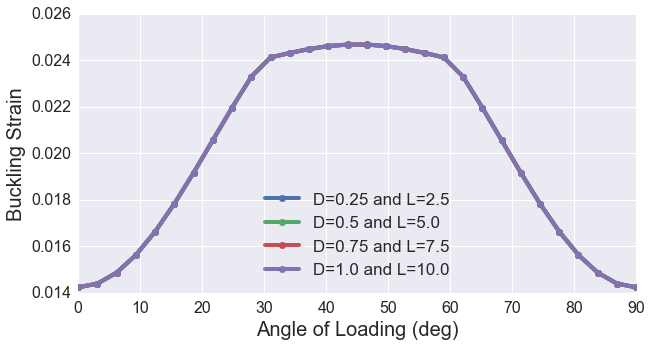

In [11]:
path='Critical Buckling Two Diagonal D over L Test/'

#parsing the data to respective arrays

FreqAll=[]
X2All=[]
for j in xrange(1,5):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_Freq_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file.close()
    
    FreqToStrain=2./20.

    
    D=table1[0,0]
    L=table1[0,0]/0.1
    THETA=table1[:,1]
    Freq=table1[:,2]*FreqToStrain

    plt.plot(THETA,Freq,'-o',lw=4,label='D='+str(D)+' and L='+str(L))


plt.xlabel(r'Angle of Loading (deg)')
plt.ylabel(r'Buckling Strain')
plt.legend(loc=8)

# Stiffness Different Geometries

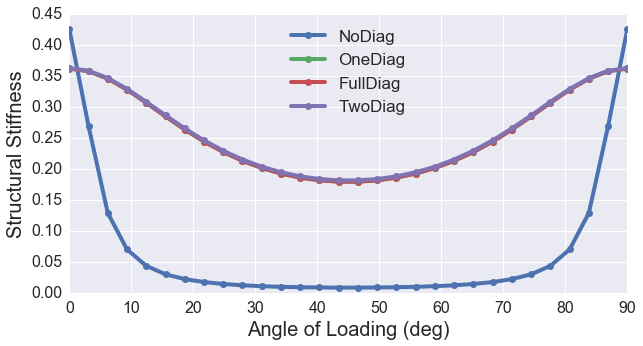

In [10]:
path='Linear Stiffness Different Geometries/'

file = open(path+'noDiag0_D_Output.txt', 'rb')
table1D = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
file = open(path+'noDiag0_RF_Output.txt', 'rb')
table1RF = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'oneDiag0_D_Output.txt', 'rb')
table2D = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
file = open(path+'oneDiag0_RF_Output.txt', 'rb')
table2RF = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'fullDiag0_D_Output.txt', 'rb')
table3D = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
file = open(path+'fullDiag0_RF_Output.txt', 'rb')
table3RF = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'twoDiag0_D_Output.txt', 'rb')
table4D = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
file = open(path+'twoDiag0_RF_Output.txt', 'rb')
table4RF = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file.close()

Diam=table1D[1,1]
Spacing=Diam/0.1
V=Diam*Spacing**2
THETA=table1D[:,2]

S_NoDiag=(table1RF[:,6]/V)/table1D[:,6]
S_OneDiag=(table2RF[:,6]/V)/table2D[:,6]
S_FullDiag=(table3RF[:,6]/V)/table3D[:,6]
S_TwoDiag=(table4RF[:,6]/V)/table4D[:,6]

plt.plot(THETA,S_NoDiag,'-o',lw=4,label='NoDiag')
plt.plot(THETA,S_OneDiag,'-o',lw=4,label='OneDiag')
plt.plot(THETA,S_FullDiag,'-o',lw=4,label='FullDiag')
plt.plot(THETA,S_TwoDiag,'-o',lw=4,label='TwoDiag')

plt.figure(1)
plt.xlabel(r'Angle of Loading (deg)')
plt.ylabel(r'Structural Stiffness')
plt.legend(loc=9)

# Buckling Different Geometries

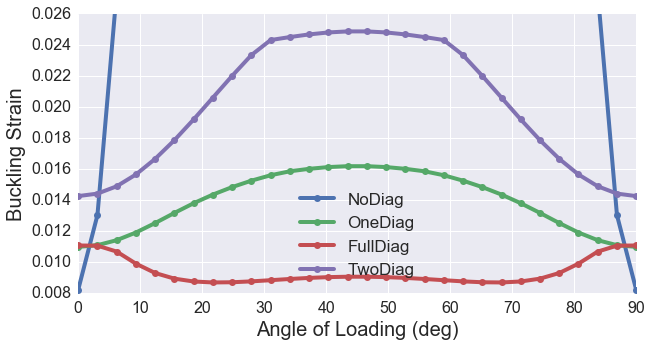

In [9]:
path='Critical Buckling Different Geometries/'

file = open(path+'noDiag0_Freq_Output.txt', 'rb')
table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'oneDiag0_Freq_Output.txt', 'rb')
table2 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'fullDiag0_Freq_Output.txt', 'rb')
table3 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'twoDiag0_Freq_Output.txt', 'rb')
table4 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file.close()

FreqToStrain=2./20.

THETA=table1[:,1]
Freq1=table1[:,2]*FreqToStrain
Freq2=table2[:,2]*FreqToStrain
Freq3=table3[:,2]*FreqToStrain
Freq4=table4[:,2]*FreqToStrain

plt.plot(THETA,Freq1,'-o',lw=4,label='NoDiag')
plt.plot(THETA,Freq2,'-o',lw=4,label='OneDiag')
plt.plot(THETA,Freq3,'-o',lw=4,label='FullDiag')
plt.plot(THETA,Freq4,'-o',lw=4,label='TwoDiag')


plt.xlabel(r'Angle of Loading (deg)')
plt.ylabel(r'Buckling Strain')
plt.ylim([0.008, 0.026])
plt.legend(loc=8)